#Set up Colab and Drive for Project

In [32]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
%cd '/content/gdrive/My Drive/MVP Datensatz/'
train_dir = 'Trainingsdatensatz5'

/content/gdrive/My Drive/MVP Datensatz


In [0]:
from keras import optimizers
from keras import layers
from keras import models
from keras import initializers

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K


#Global Variables


In [0]:
Abfragebild = 'Testbilder/P1040699.JPG'

Speicherort_KI_Modell = '/content/gdrive/My Drive/Keras Models'
Name_KI_Modell = '/Xception_5-1.h5'

#Create Base Model, Training and Valdidation Generators


In [0]:
# Xception
img_width = 299
img_height = 299

from keras.applications import Xception
base_model = Xception(
  weights = 'imagenet',
  include_top = False,
  input_shape = (img_width,img_height,3) 
 )

In [92]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

##Augmentations


In [0]:
featurewise_center = False
samplewise_center = False
featurewise_std_normalization = False
samplewise_std_normalization = False
zca_whitening = False
horizontal_flip = False
vertical_flip = False

brightness_range = None 
preprocessing_function = None

zca_epsilon = 0
rotation_range = 0
width_shift_range = [-1, 0, +1]
height_shift_range = [-1, 0, +1]
shear_range = 0.0
zoom_range = 0.2
channel_shift_range = 0.0
cval = 0.0
interpolation_order = 1

fill_mode = 'nearest'
data_format = 'channels_last'


##Preparing Data

In [0]:
batch_s = 30

validation_split = 0.4
rescale = 1./255

In [0]:
train_datagen = ImageDataGenerator(
    featurewise_center = featurewise_center,
    samplewise_center = samplewise_center,
    featurewise_std_normalization = featurewise_std_normalization,
    samplewise_std_normalization = samplewise_std_normalization,
    zca_whitening = zca_whitening,
    zca_epsilon = zca_epsilon,
    rotation_range = rotation_range,
    width_shift_range = width_shift_range,
    height_shift_range = height_shift_range,
    brightness_range = brightness_range,
    shear_range = shear_range,
    zoom_range = zoom_range,
    channel_shift_range = channel_shift_range,
    fill_mode = fill_mode,
    cval = cval,
    horizontal_flip = horizontal_flip,
    vertical_flip = vertical_flip,
    preprocessing_function = preprocessing_function,
    data_format = data_format,
    validation_split = validation_split,
    interpolation_order = interpolation_order,
    rescale = rescale,
    dtype = 'float32')

In [40]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width,img_height),
    batch_size = batch_s,
    class_mode = 'categorical',
    subset = 'training')

Found 84 images belonging to 5 classes.


In [62]:
label_map = (train_set.class_indices)
label_map

{'Art1': 0, 'Art2': 1, 'Art3': 2, 'Art4': 3, 'Art5': 4}

In [41]:
validation_set = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (img_width,img_height),
    batch_size = batch_s,
    class_mode = 'categorical',
    subset = 'validation')

Found 54 images belonging to 5 classes.


#Create Model


In [0]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu',
                       kernel_initializer = initializers.RandomNormal(stddev = 0.01),
                       bias_initializer = initializers.Zeros()))
model.add(layers.Dense(5, activation = 'sigmoid',
                       kernel_initializer = initializers.RandomNormal(stddev = 0.01),
                       bias_initializer = initializers.Zeros()))
for layer in base_model.layers:
    layer.trainable = False

##Model Summary

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten_4 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 204800)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               52429056  
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1285      
Total params: 73,291,821
Trainable params: 52,430,341
Non-trainable params: 20,861,480
_________________________________________________________________


#Train Model

In [0]:
opt = optimizers.RMSprop(learning_rate=0.001)
epochs = 50

In [102]:
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['acc'])
history = model.fit_generator(train_set,
                              epochs = epochs,
                              validation_data = validation_set)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 4.6746 - acc: 0.2143 - val_loss: 1.5826 - val_acc: 0.2407
Epoch 2/50
3/3 [==============================] - 3s 860ms/step - loss: 1.7229 - acc: 0.3929 - val_loss: 2.1970 - val_acc: 0.2222
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 1.4898 - acc: 0.3452 - val_loss: 1.4801 - val_acc: 0.3148
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.6050 - acc: 0.3333 - val_loss: 2.3797 - val_acc: 0.4074
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 1.3775 - acc: 0.4881 - val_loss: 3.4010 - val_acc: 0.2593
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 1.7591 - acc: 0.3214 - val_loss: 1.6698 - val_acc: 0.3148
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 1.4899 - acc: 0.4762 - val_loss: 1.3938 - val_acc: 0.3333
Epoch 8/50
3/3 [==============================] - 3s 1s/step - loss: 1.3167 - acc: 0.5833 - val_loss: 1.9191

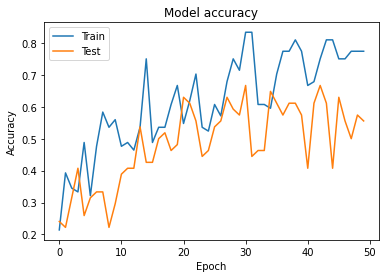

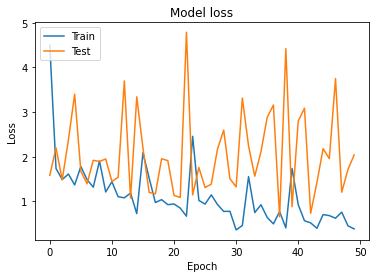

In [103]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


##Testing Model

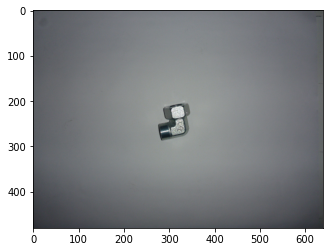

In [97]:
bild = 'Testbilder/P1040700.JPG'
im = plt.imread(bild)

plt.imshow(im)
plt.show()


In [0]:
AB = image.load_img(bild, target_size=(img_width, img_height))
AB = image.img_to_array(AB)
AB = np.expand_dims(AB, axis=0)

In [105]:
test_prediction = model.predict(AB)
test_prediction = test_prediction.flatten()
test_prediction

array([0., 0., 0., 0., 0.], dtype=float32)

In [81]:
model.predict_classes(AB)

array([0])

##Save Model

In [0]:
model.save("/content/gdrive/My Drive/Keras Models/Xception_5-1.h5")


#Load Validation Images

In [0]:
folder_path = 'Testbilder'

In [0]:
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

In [90]:
images = np.vstack(images)
classes = model.predict_classes(images)
print(classes)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#Perform Classification

In [0]:
import json
def Vorhersage(Artikelfoto, Speicherort_KI_Modell, Name_KI_Modell):

    model = models.load_model(Speicherort_KI_Modell + Name_KI_Modell)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
    Artikelfoto = image.load_img(Artikelfoto, target_size=(img_width, img_height))
    Artikelfoto = image.img_to_array(Artikelfoto)
    Artikelfoto = np.expand_dims(Artikelfoto, axis=0)
    prediction = model.predict(Artikelfoto)
    prediction = prediction.flatten()
    artikelnummer = 'Art' + str(np.argmax(prediction)+1)
    wahrscheinlichkeit = str(prediction[np.argmax(prediction)])

    response = json.dumps({"Artikelnummer":artikelnummer, "Wahrscheinlichkeit":wahrscheinlichkeit})

    return response

In [56]:
Vorhersage(Abfragebild, Speicherort_KI_Modell, Name_KI_Modell)

'{"Artikelnummer": "Art1", "Wahrscheinlichkeit": "0.0"}'